In [1]:
# 1)Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
# zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
# ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
# Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
# Полученные значения должны быть равны.
# Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
# а затем с использованием функций из библиотек numpy и pandas.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
zp=np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks=np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

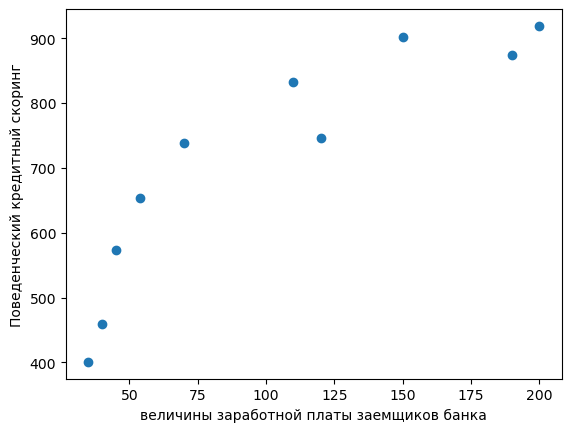

In [4]:
plt.scatter(zp,ks)
plt.xlabel('величины заработной платы заемщиков банка')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

In [5]:
def covar(array1, array2):
    MXY=sum(array1*array2)/len(array1)
    MX=sum(array1)/len(array1)
    MY=sum(array2)/len(array2)
    return MXY-MX*MY

In [6]:
covar(zp,ks)

9157.839999999997

In [7]:
np.cov(zp, ks, ddof=0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [8]:
def sigma(array, offset=True):
    mean_array=sum(array)/len(array)
    square_dev=(array-mean_array)**2
    variance=sum(square_dev)/len(array) if offset else sum(square_dev)/(len(array)-1)
    return variance**0.5    

In [9]:
r=covar(zp, ks)/(sigma(zp)*sigma(ks))
print(f'Коэффициент корреляции r = {r: .5f}')

Коэффициент корреляции r =  0.88749


In [10]:
r1=np.cov(zp, ks, ddof=1)/(sigma(zp, offset=False)*sigma(ks, offset=False))
print(f'Коэффициент корреляции r = {r1}')

Коэффициент корреляции r = [[0.33866702 0.88749009]
 [0.88749009 2.95275283]]


In [11]:
np.corrcoef(zp,ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [12]:
df=pd.DataFrame(data={'zp':zp, 'ks':ks})
df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [13]:
df.corr()

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000
